In [112]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import r2_score

from scipy import stats as st

In [2]:
indice = ["Year" , "Median", "Min" , "Max" ,5,6,7,8,9,10,11,12]
totale = pd.read_fwf("HadCRUT_Totale_Annuale.txt" , header = None , names = indice)
totale = totale.drop([5,6,7,8,9,10,11,12] , axis = 1)
totale.describe()

,Year,Median,Min,Max
count,172.000000,172.000000,172.000000,172.000000
mean,1935.500000,-0.076529,-0.121855,-0.039488
std,49.796252,0.317301,0.327117,0.314831
min,1850.000000,-0.544000,-0.597000,-0.498000
25%,1892.750000,-0.294500,-0.355750,-0.252750
50%,1935.500000,-0.148000,-0.194000,-0.124500
75%,1978.250000,0.047250,0.026500,0.075250
max,2021.000000,0.797000,0.762000,0.835000


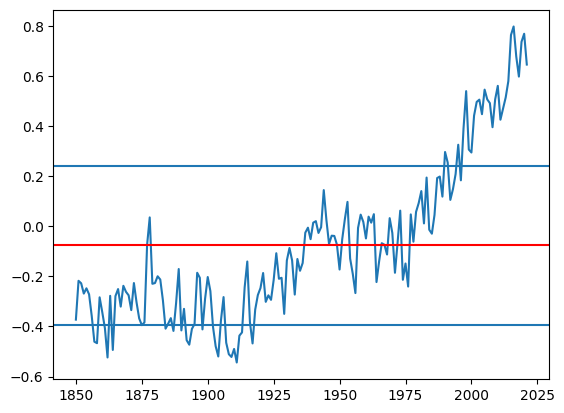

In [157]:
plt.plot(totale['Year'] , totale['Median'])
plt.axhline(y=totale['Median'].mean() , color = 'r')
plt.axhline(y = totale['Median'].mean() + totale['Median'].std())
plt.axhline(y = totale['Median'].mean() - totale['Median'].std())

#Sarebbe da fare bene sto grafico

In [4]:
def regressione(data) :
    X = np.zeros((len(data['Median']) , 2))
    X[:,0] = 1
    X[:,1] = data['Year']
    clf = skl.LinearRegression().fit(X , data['Median'])
    fity = clf.predict(X)
    devstd = r2_score(data['Median'] , fity)

    result = [fity , devstd]
    return result



In [5]:
filtro_post = totale[totale['Year'] < 1975].index
filtro_pre = totale[totale['Year'] > 1975].index

post_1975 = totale.drop(filtro_post)
pre_1975 = totale.drop(filtro_pre)

fit_tot = regressione(totale)
fit_post = regressione(post_1975)
fit_pre = regressione(pre_1975)


0.39540668460101003 0.8787564229487017


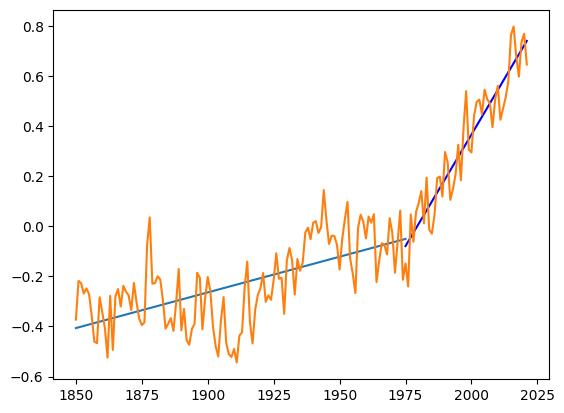

In [6]:
plt.plot(post_1975['Year'] , fit_post[0], c = 'b')
plt.plot(pre_1975['Year'] , fit_pre[0])
plt.plot(totale['Year'] , totale['Median'])

print(fit_pre[1] , fit_post[1])

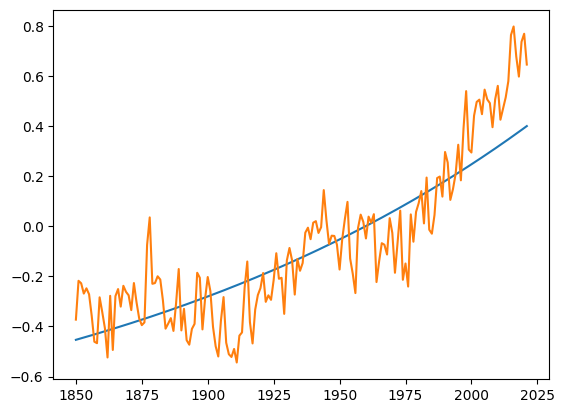

In [7]:
p = np.polyfit(totale['Year'] , np.log(totale['Median'] + 1) , 1)
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(totale['Year']), np.max(totale['Year']), 172)
y_fitted = a * np.exp(b * x_fitted ) -1

plt.plot(x_fitted , y_fitted)
plt.plot(totale['Year'] , totale['Median'])

In [33]:
def power_low(n , data) : 

    #valori medi
    p = np.polyfit(data['Year'] , data['Median']  , n )
    y_fitted = np.zeros(data['Year'].count())
    x_fitted = np.linspace(np.min(data['Year']), np.max(data['Year']), data['Year'].count())
    for i in range(n+1) : 
        y_fitted += p[i] * x_fitted**(n-i)
    plt.plot(x_fitted , y_fitted)
    plt.plot(totale['Year'] , totale['Median'])

    #media + devstd
    p = np.polyfit(data['Year'] , data['Median'] + data['Max']  , n )
    y_fitted = np.zeros(data['Year'].count())
    x_fitted = np.linspace(np.min(data['Year']), np.max(data['Year']), data['Year'].count())
    for i in range(n+1) : 
        y_fitted += p[i] * x_fitted**(n-i)
    plt.plot(x_fitted , y_fitted)

    #media - devstd
    p = np.polyfit(data['Year'] , data['Median'] - data['Min']  , n )
    y_fitted = np.zeros(data['Year'].count())
    x_fitted = np.linspace(np.min(data['Year']), np.max(data['Year']), data['Year'].count())
    for i in range(n+1) : 
        y_fitted += p[i] * x_fitted**(n-i)
    plt.plot(x_fitted , y_fitted)

    plt.show()



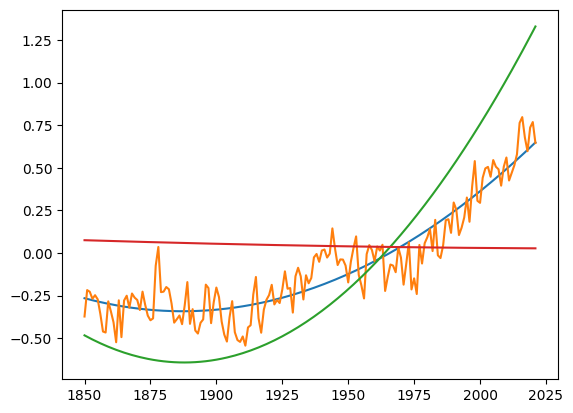

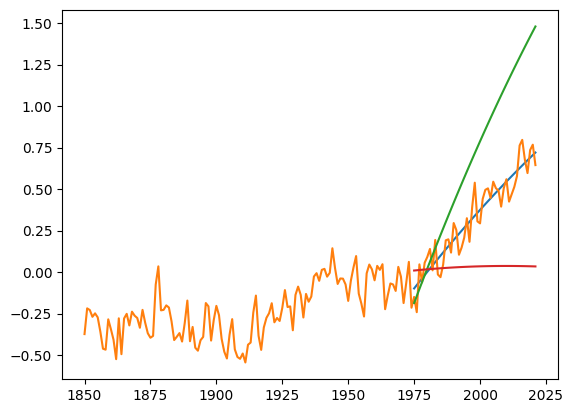

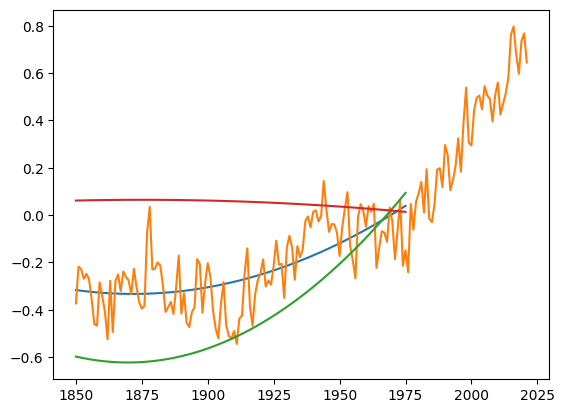

In [35]:
power_low(2 , totale)
power_low(2 , post_1975)
power_low(2 , pre_1975)

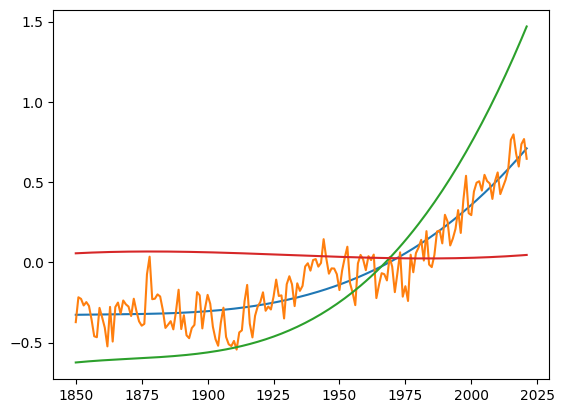

In [158]:
power_low(3 , totale)

In [40]:
def filtro_5(inizio) :
    filtro1 = totale[totale['Year'] < inizio ].index
    filtro2 = totale[totale['Year'] > inizio + 5].index
    data = totale.drop(filtro1)
    data = data.drop(filtro2)

    return data
    

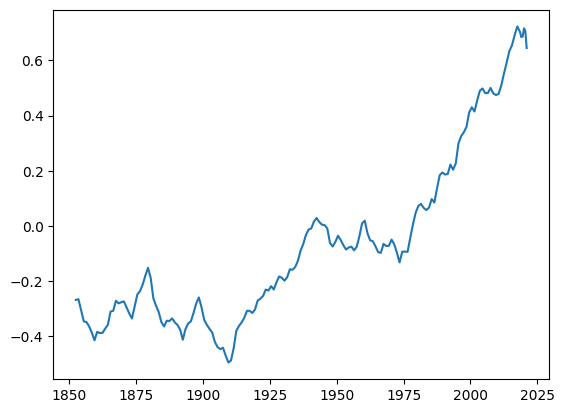

In [105]:
date = np.array([])
medie = np.array([])
for i in range(totale['Year'].min() , totale['Year'].max() + 1, 1) :
    date = np.append(date , filtro_5(i)['Year'].mean())
    medie = np.append(medie , filtro_5(i)['Median'].mean())

plt.plot(date, medie)

dati_linearizzati = {'Year' : date , "Median" : medie }

dati_linearizzati = pd.DataFrame(dati_linearizzati)


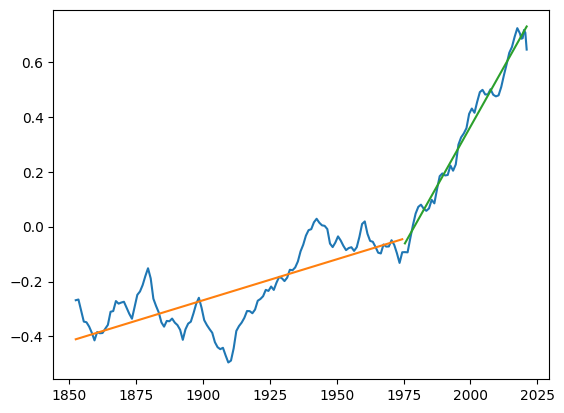

In [111]:

plt.plot(dati_linearizzati['Year'] , dati_linearizzati['Median'])


filtro_post = dati_linearizzati[dati_linearizzati['Year'] < 1975].index
filtro_pre = dati_linearizzati[dati_linearizzati['Year'] > 1975].index

post_1975 = dati_linearizzati.drop(filtro_post)
pre_1975 = dati_linearizzati.drop(filtro_pre)

fit_linearizzati = regressione(dati_linearizzati)
fit_post = regressione(post_1975)
fit_pre = regressione(pre_1975)

plt.plot(pre_1975['Year'] , fit_pre[0])
plt.plot(post_1975['Year'] , fit_post[0])


In [141]:
emissioni = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/global.1751_2014.csv")
emissioni = emissioni.drop(['Carbon emissions from gas fuel consumption' , 'Carbon emissions from liquid fuel consumption' , 'Carbon emissions from solid fuel consumption', 'Carbon emissions from cement production' ,'Carbon emissions from gas flaring' ,'Per capita carbon emissions (metric tons of carbon; after 1949 only)'] , axis = 1)
emissioni = emissioni.drop(0)

#conversione in numeri
emissioni['Year'] = pd.to_numeric(emissioni['Year'])
emissioni['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] = pd.to_numeric(emissioni['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'])
filro = emissioni[emissioni['Year'] < 1850].index
emissioni = emissioni.drop(filro)
emissioni

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
100,1850,54
101,1851,54
102,1852,57
103,1853,59
104,1854,69
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


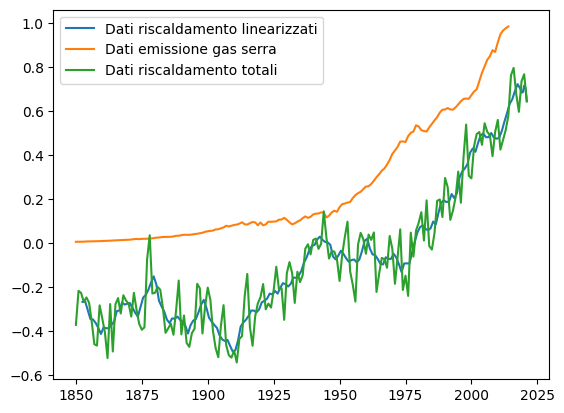

In [156]:
plt.plot(dati_linearizzati['Year'] , dati_linearizzati['Median'] , label = "Dati riscaldamento linearizzati")
plt.plot(emissioni['Year'] , 0.0001 * emissioni['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] , label = "Dati emissione gas serra")
plt.plot(totale['Year'] , totale['Median'] , label = "Dati riscaldamento totali")
plt.legend()